<a href="https://colab.research.google.com/github/amirawaleed556/AI_projects_python_amira/blob/main/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading images

In [7]:
import cv2 , os
import numpy as np
data_path = '/content/drive/MyDrive/emotions_detect_dataset'
data_list = os.listdir(data_path)
img_data =[]
for dataset in data_list:
  img_list =os.listdir(data_path +'/'+ dataset)
  print('Loading the images from the folder -{}\n'.format(dataset))

  for img in img_list:
    input_img= cv2.imread(data_path + '/' + dataset +'/'+img)
    input_img_resize= cv2.resize(input_img,(50,50))
    img_data.append(input_img_resize)

data =np.array(img_data)
data =data.astype('float32')
data = data / 255.0
data.shape

Loading the images from the folder -anger

Loading the images from the folder -contempt

Loading the images from the folder -surprise

Loading the images from the folder -disgust

Loading the images from the folder -happy

Loading the images from the folder -sadness

Loading the images from the folder -fear



(981, 50, 50, 3)

**Preparing the data**

In [8]:
from sklearn.utils import shuffle
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
num_classes =len(data_list)
num_samples = data.shape[0]
# one hot vector
labels =np.ones((num_samples,),dtype='int64')
labels[0:135] = 0 # 135 anger
labels[135:189] = 1 # 54 contempt
labels[189:366] = 2 # 177 disgust
labels[366:441] = 3 # 75  fear 
labels[441:648] = 4 # 207 happy
labels[648:732] = 5 # 84  sadness
labels[732:981] = 6 # 249 surprise
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [9]:
names =data_list
img_labels = np_utils.to_categorical(labels, num_classes)
# shuffle the data 
X_img , Y_img = shuffle(data,img_labels,random_state=2)
# preparing the data for train & test data
X_train,X_test,Y_train,Y_test = train_test_split(X_img,Y_img, test_size =0.2,random_state=2)


**Show some samples of images**

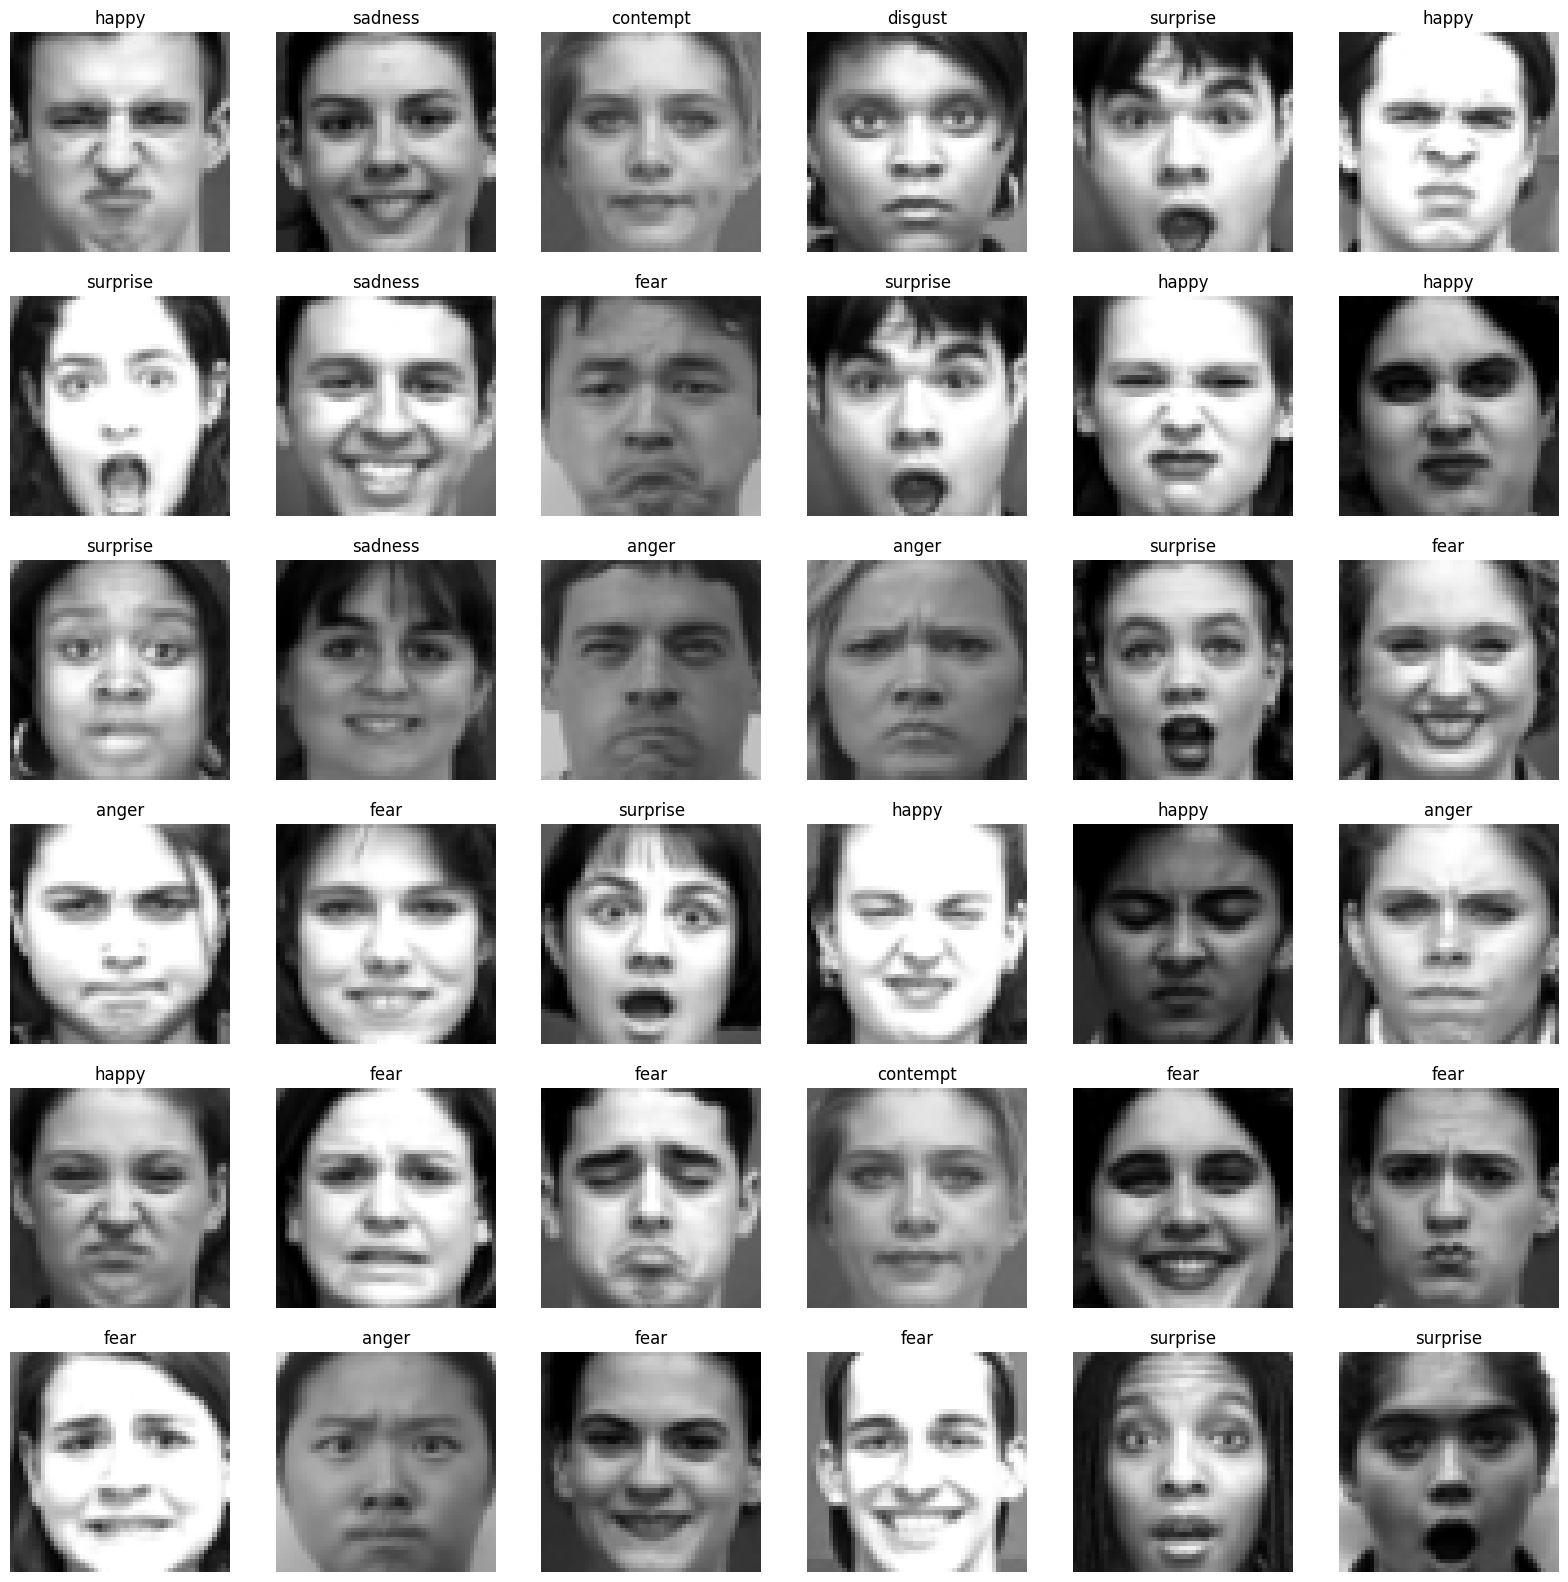

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
for i,j in enumerate(list(np.random.randint(0,len(X_img),36))):
  plt.subplot(6,6,i+1)
  plt.imshow(X_img[j])
  plt.axis('off')
  plt.title(names[list(Y_img[j].astype(int)).index(1)])



**Build the CNN model**

In [11]:
# import dependencies
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
def create_model():

  input_shape =(50,50,3)
  # create model structure
  emotion_model = Sequential()
  emotion_model.add(Conv2D(6,(5,5), activation='relu', input_shape=(50, 50, 3),padding='same'))
  #emotion_model.add(Conv2D(64(3,3), kernel_size=(3, 3), activation='relu'))
  emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
  #emotion_model.add(Dropout(0.25))

  emotion_model.add(Conv2D(16, (5,5) ,  activation='relu'))
  emotion_model.add(MaxPooling2D(pool_size=(2,2)))
  #emotion_model.add(Dropout(0.25))

  emotion_model.add(Conv2D(64,(3,3), activation='relu'))
  emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

  emotion_model.add(Flatten())
  emotion_model.add(Dense(128, activation='relu'))
  emotion_model.add(Dropout(0.5))

  emotion_model.add(Dense(7, activation='softmax'))
  emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])
  return emotion_model



**Create and plot the DL model**

In [12]:
emotion_model =create_model()
emotion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 50, 6)         456       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 6)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 16)        2416      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          9280      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)        

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


**Train the model**

In [13]:
history = emotion_model.fit(X_train,Y_train ,epochs=200, validation_data =(X_test ,Y_test) )

Epoch 1/200
25/25 [==============================] - 9s 26ms/step - loss: 1.9067 - accuracy: 0.1964 - val_loss: 1.8324 - val_accuracy: 0.3096
Epoch 2/200
25/25 [==============================] - 0s 5ms/step - loss: 1.8602 - accuracy: 0.2436 - val_loss: 1.7772 - val_accuracy: 0.3096
Epoch 3/200
25/25 [==============================] - 0s 6ms/step - loss: 1.8428 - accuracy: 0.2487 - val_loss: 1.7613 - val_accuracy: 0.3096
Epoch 4/200
25/25 [==============================] - 0s 6ms/step - loss: 1.8371 - accuracy: 0.2538 - val_loss: 1.7561 - val_accuracy: 0.3096
Epoch 5/200
25/25 [==============================] - 0s 5ms/step - loss: 1.8225 - accuracy: 0.2653 - val_loss: 1.7343 - val_accuracy: 0.3096
Epoch 6/200
25/25 [==============================] - 0s 5ms/step - loss: 1.8069 - accuracy: 0.2551 - val_loss: 1.7198 - val_accuracy: 0.3198
Epoch 7/200
25/25 [==============================] - 0s 6ms/step - loss: 1.7880 - accuracy: 0.2781 - val_loss: 1.7007 - val_accuracy: 0.4010
Epoch 8/200


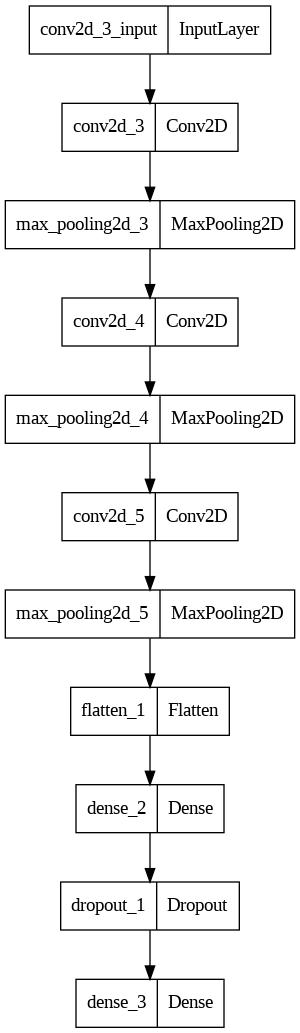

In [30]:
from keras.utils.vis_utils import plot_model
plot_model(emotion_model, 'my_model.jpg')

**Testing**

The accuracy for testing  : 80.203044
1/1 [==============================] - 0s 17ms/step


[0, 0, 0, 0, 0, 0, 0]

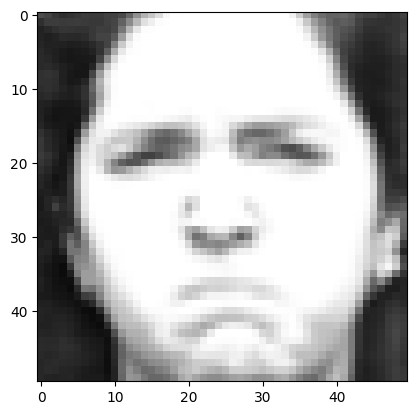

In [40]:

loss , score =emotion_model.evaluate(X_test,Y_test,verbose=0)
print('The accuracy for testing  : %f' %(score *100))
plt.imshow(X_test[0])
Y_predict = emotion_model.predict(X_test[0:1])
#X_test[0:1].shape
list(Y_predict.astype(int).flatten())



**The comparison & plot the losses values**

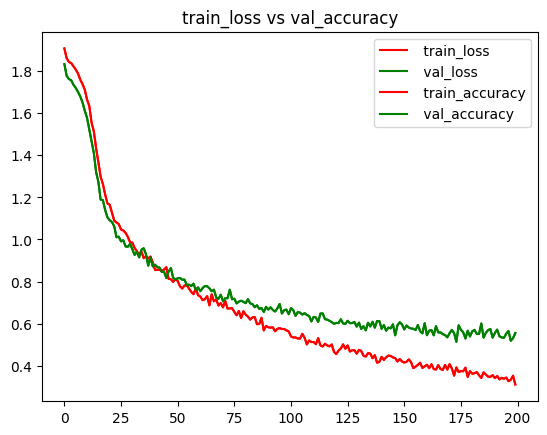

In [42]:
train_loss = history.history['loss']
val_loss=history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy=history.history['val_accuracy']
steps =range(len(train_loss))

plt.plot(steps, train_loss, 'r' ,label=' train_loss')
plt.plot(steps, val_loss, 'g' ,label=' val_loss')
plt.title ('train_loss vs val_loss')
plt.legend()


plt.plot(steps, train_loss, 'r' ,label=' train_accuracy')
plt.plot(steps, val_loss, 'g' ,label=' val_accuracy')
plt.title ('train_loss vs val_accuracy')
plt.legend()


